In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import pandas as pd
import secrets
from networkx.algorithms import community
import random as rnd

%matplotlib inline

In [4]:
fname1 = 'budapest_connectome_low_confidence.graphml'
fname2 = 'budapest_connectome_medium_confidence.graphml'
fname3 = 'budapest_connectome_high_confidence.graphml'

G1 = nx.read_graphml('./' + fname1)
G2 = nx.read_graphml('./' + fname2)
G3 = nx.read_graphml('./' + fname3)

In [38]:
#generate list of all parent regions, hemisphere specific, with no duplicates
def parenthem(G):
    allregions = []
    for node in G.nodes():
        if 'dn_name' in G.nodes[node]:
            s = G.nodes[node]['dn_name']
            substrings = s.split("_")
            allregions.append(substrings[0])
    allregions = list(set(allregions))
    return allregions


class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value

def count_degrees(G):
    import copy
    parents = parenthem(G)
    temp = 0
    counts = my_dictionary()
    degrees = my_dictionary()

    for i in G.nodes():
        for j in parents:
            if j not in counts and j not in degrees:
                counts.add(j,0)
                degrees.add(j,0)

            if 'dn_name' in G.nodes[i]:
                s = G.nodes[i]['dn_name']
                substrings = s.split("_")
                if substrings[0] == j:
                    counts[j] += 1
                    degrees[j] += G.degree(i)
    
    deg = {}

    for i in parents:
        temp = degrees[i]/counts[i]
        deg[i] = temp

    return deg

def get_connections(G,region):
    nbrs = []
    for i in G.nodes():
        if 'dn_name' in G.nodes[i]:
            s = G.nodes[i]['dn_name']
            substrings = s.split("_")
        if region == substrings[0]:
            for j in G.neighbors(i):
                if 'dn_name' in G.nodes[j]:
                    s = G.nodes[j]['dn_name']
                    substrings = s.split("_")
                    nbrs.append(substrings[0])

    nbrs = list(set(nbrs))
    return nbrs

# Generate n random colors in hexadecimal format
def generatecolors(n):
    colors = ['#' + hex(secrets.randbits(24))[2:].zfill(6) for _ in range(n)]
    return colors

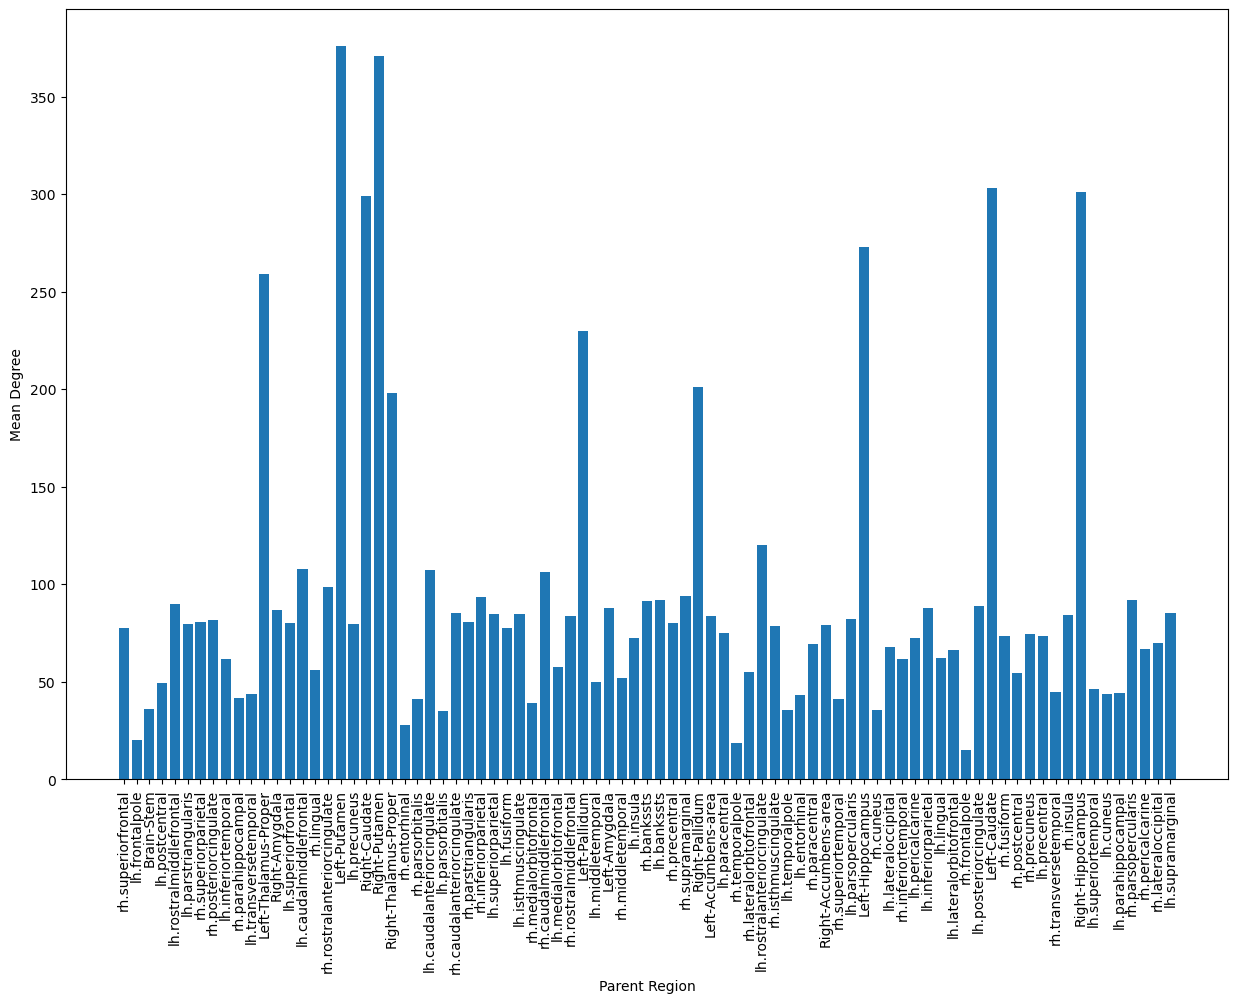

rh.lateralorbitofrontal is connected to:
25
['rh.superiorfrontal', 'rh.lateralorbitofrontal', 'rh.parsorbitalis', 'rh.superiorparietal', 'rh.precuneus', 'rh.posteriorcingulate', 'Right-Accumbens-area', 'rh.paracentral', 'rh.caudalanteriorcingulate', 'rh.parstriangularis', 'Right-Amygdala', 'rh.insula', 'rh.medialorbitofrontal', 'rh.caudalmiddlefrontal', 'rh.rostralanteriorcingulate', 'rh.rostralmiddlefrontal', 'Right-Caudate', 'rh.precentral', 'rh.parsopercularis', 'Right-Putamen', 'rh.frontalpole', 'rh.supramarginal', 'Right-Pallidum', 'Right-Thalamus-Proper', 'Left-Caudate']


In [25]:
D = count_degrees(G1)
plt.rcParams["figure.figsize"] = (15,10)
plt.bar(*zip(*D.items()))
plt.xticks(rotation='vertical')
plt.ylabel('Mean Degree')
plt.xlabel('Parent Region')
plt.show()


test = get_connections(G1,'rh.lateralorbitofrontal')
print(f'rh.lateralorbitofrontal is connected to:')
print(len(test))
print(test)

In [54]:
def generate_overview(Go,parent_colors):
  G = nx.Graph()

  parent_colors = generatecolors(83)

  nodes = parenthem(Go)

  edgelist = []
  for i in nodes:
    connections = get_connections(Go,i)
    for j in connections:
      edgelist.append((i,j))

  G.add_nodes_from(nodes)
  G.add_edges_from(edgelist)

  n = len(nx.nodes(G)) # num nodes 
  m = len(nx.edges(G)) # num edges
  kmean = (2*m)/n # mean degree formula for undirected graph
  C = nx.transitivity(G) # clustering coeffcient

  print(f'number of nodes, n  = {n}')
  print(f'number of edges, m  = {m}')
  print(f'mean degree,    <k> = %5.2f' % kmean)
  print(f'clustering coefficient, C     = %5.2f' % C)


  node_ops = {"node_size":100}
  edge_ops = {"width": .50, "alpha": 1, "edge_color": "black"}
  pos=nx.spring_layout(G)
  parent_dict = {}
  parents = nodes
  for i, parent in enumerate(parents):
      parent_dict[parent] = parent_colors[i]
  colors = list(parent_dict.values())
  nx.draw_networkx_nodes(G, pos, **node_ops, node_color=colors)
  nx.draw_networkx_edges(G, pos, **edge_ops)
  handles = [mpatches.Patch(color=color, label=parent) for parent, color in parent_dict.items()]
  plt.legend(handles=handles, title='Hemisphere', loc='upper left', bbox_to_anchor=(1, 1),ncol = 2)
  plt.show()


number of nodes, n  = 83
number of edges, m  = 1211
mean degree,    <k> = 29.18
clustering coefficient, C     =  0.68


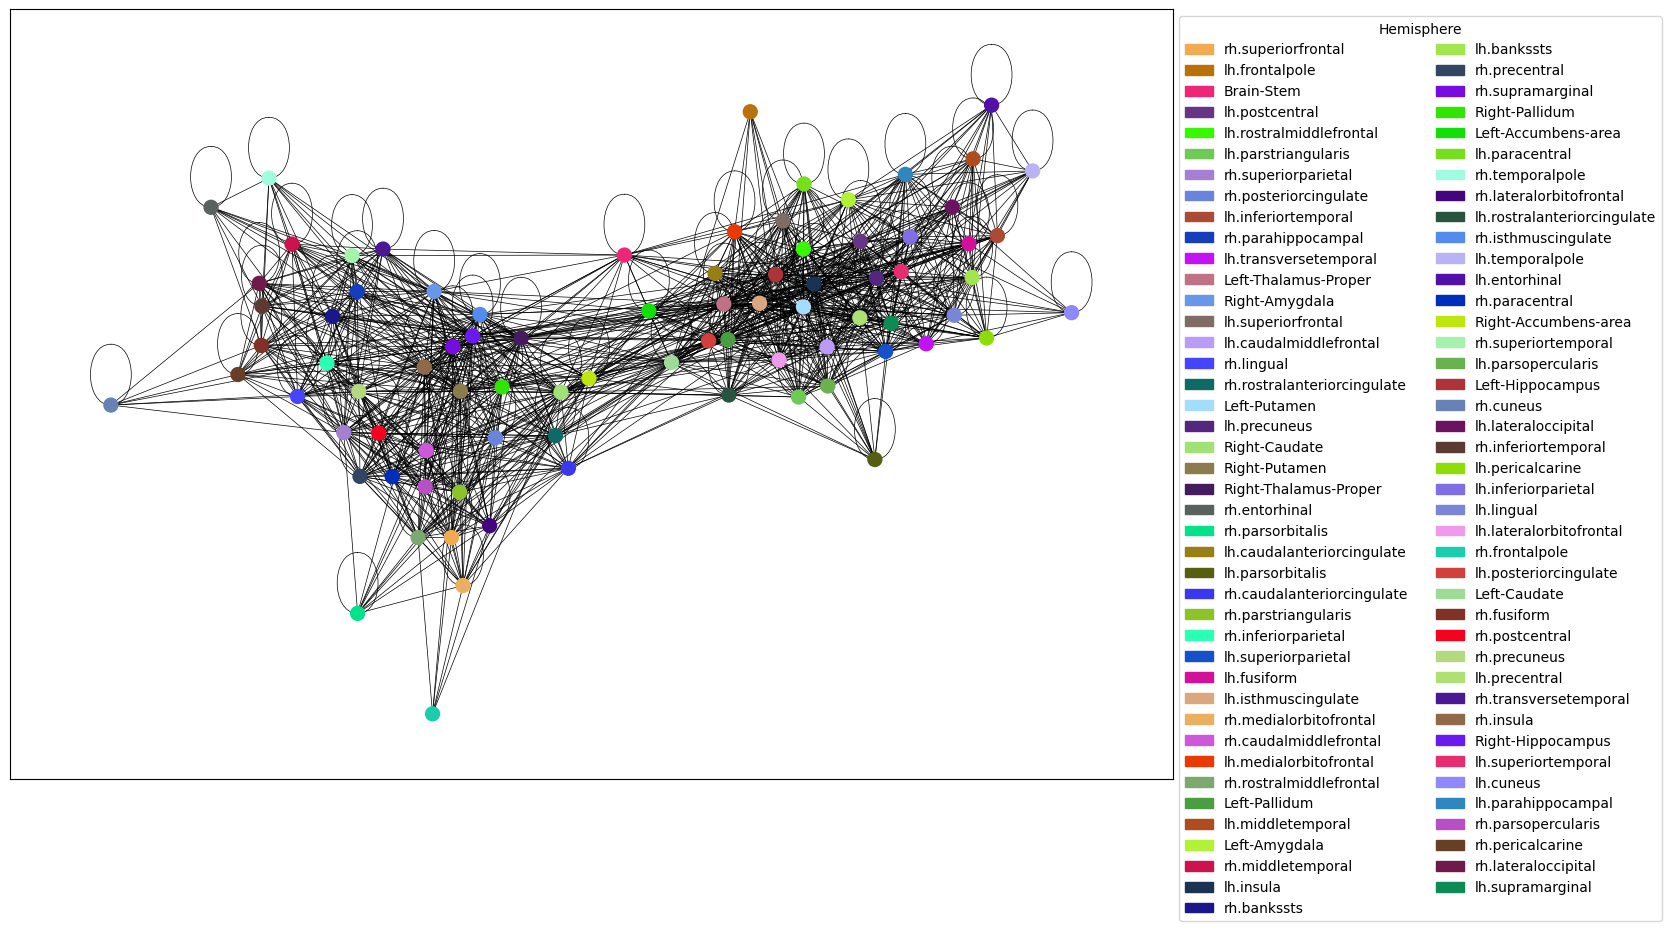

In [55]:
parent_colors = generatecolors(83)
generate_overview(G1,parent_colors)

number of nodes, n  = 83
number of edges, m  = 311
mean degree,    <k> =  7.49
clustering coefficient, C     =  0.40


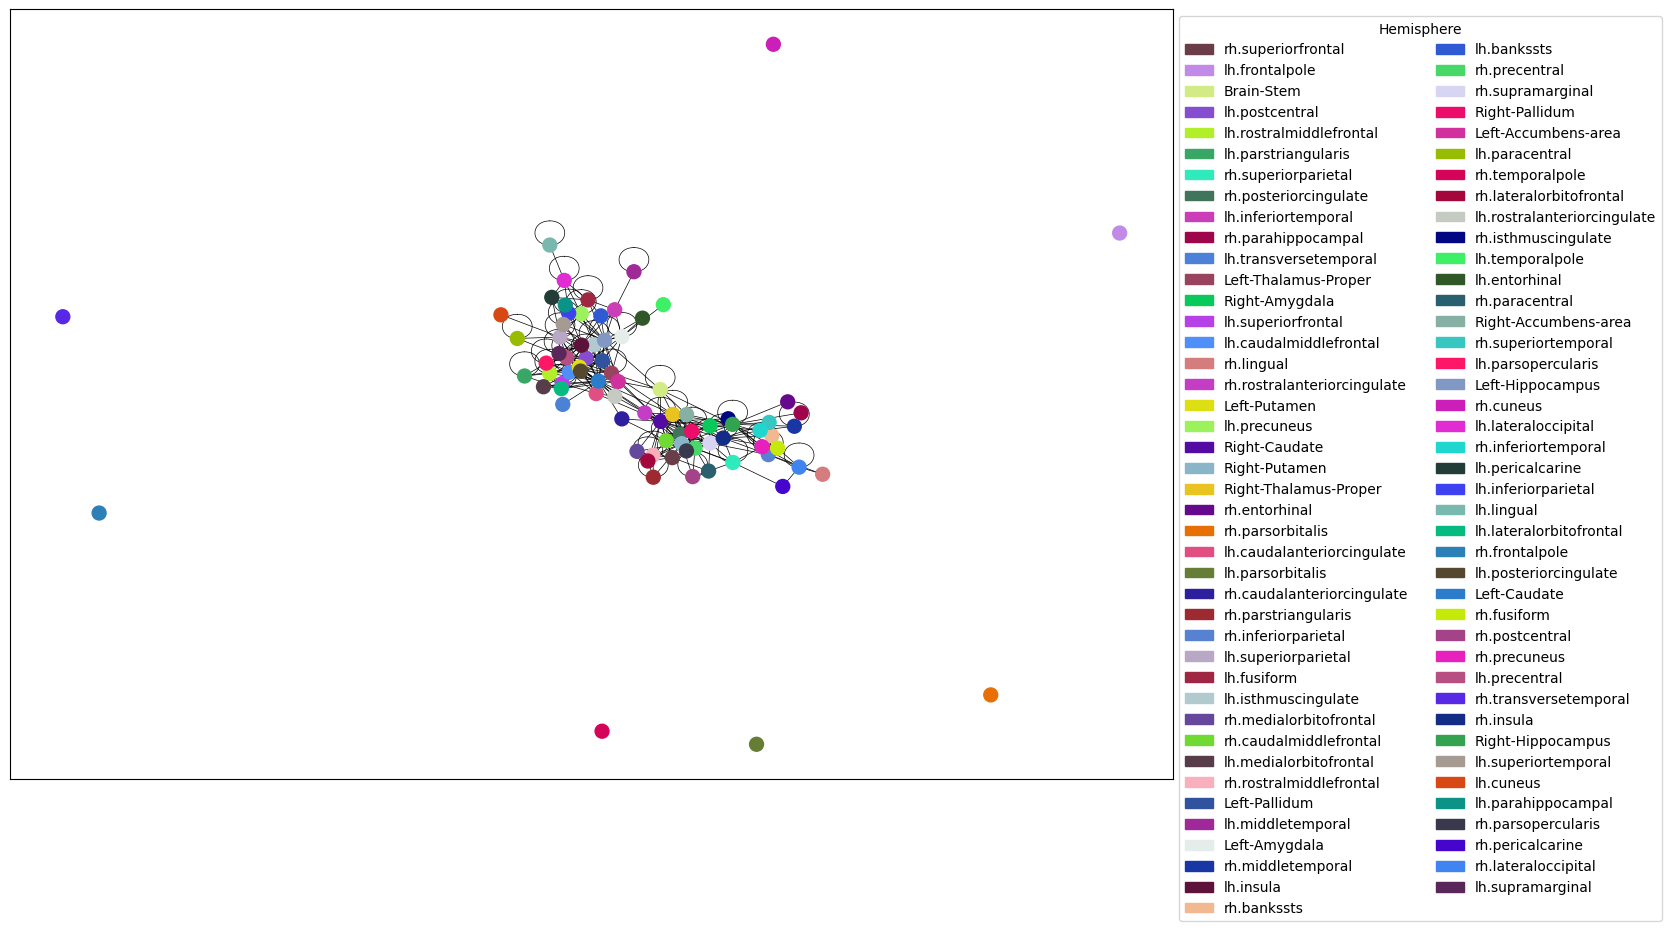

In [56]:
generate_overview(G2,parent_colors)

In [57]:
generate_overview(G3,parent_colors)

number of nodes, n  = 83
number of edges, m  = 16
mean degree,    <k> =  0.39
clustering coefficient, C     =  0.35
